In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from datetime import datetime, timedelta
import jdatetime
import arabic_reshaper
from bidi.algorithm import get_display

from src import SRC_DIR

In [2]:
def _(text):
    return get_display(
        arabic_reshaper.reshape(
            u'%s' % str(text)
      )
   )

In [3]:
event_log = pd.read_excel(SRC_DIR / 'Dataset' / 'Fall Sales Order.xlsx')

In [3]:
event_log.head()

,شماره پرونده,فعاليت,زمان انجام,نوع سند,ناحيه فروش,شرح ناحيه فروش,مشتري,گروه مشتري,شرح گروه مشتري,نام کاربري,ويزيتور,نام ويزيتور,وضعیت مرجوعی,سند حمل,کد موزع,نام موزع,نوع پرداخت,شرح نوع پرداخت
0,100989739,سفارش فروش,1400/07/01 08:11:44,ZO20,202012,منطقه10,14021788,1,خرده فروشي,VARANEGAR,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد
1,100989739,تاييد سرپرست,1400/07/01 11:38:51,ZO20,202012,منطقه10,14021788,1,خرده فروشي,A_KESHAVARZ,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد
2,100989739,دستور تحويل,1400/07/01 12:48:12,ZLF3,202012,منطقه10,14021788,1,خرده فروشي,F_ASHNAGAR,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد
3,100989739,سند حمل,1400/07/01 15:15:40,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد
4,100989739,دريافت تور,1400/07/03 06:59:57,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد


In [4]:
event_log.shape

(99973, 18)

In [5]:
event_log.isna().sum()

شماره پرونده      0
فعاليت            0
زمان انجام        0
نوع سند           0
ناحيه فروش        0
شرح ناحيه فروش    0
مشتري             0
گروه مشتري        0
شرح گروه مشتري    0
نام کاربري        0
ويزيتور           0
نام ويزيتور       0
وضعیت مرجوعی      0
سند حمل           0
کد موزع           0
نام موزع          0
نوع پرداخت        0
شرح نوع پرداخت    0
dtype: int64

In [6]:
pd.DataFrame(
    {
        'variable': event_log.columns, 
        'unique values': [event_log[col].nunique() for col in event_log.columns],
        'fraction': [round(event_log[col].nunique() / event_log.shape[0], 5) for col in event_log.columns], 
    }
).set_index('variable')

,unique values,fraction
variable,,
شماره پرونده,12603,0.12606
فعاليت,8,0.00008
زمان انجام,41107,0.41118
نوع سند,6,0.00006
ناحيه فروش,21,0.00021
شرح ناحيه فروش,21,0.00021
مشتري,4678,0.04679
گروه مشتري,6,0.00006
شرح گروه مشتري,6,0.00006


<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4 color=blue>
		<div align=right>
			<font face="B zar" size=5>
				<p></p>
				<p></p>
تبدیل تاریخ فارسی به میلادی به منظور انجام محاسبه مدت زمان فرآیند<br>

In [7]:
event_log_str=event_log['زمان انجام'].str.replace('/', ' ').str.replace(':', ' ').str.split()
event_log_str

0        [1400, 07, 01, 08, 11, 44]
1        [1400, 07, 01, 11, 38, 51]
2        [1400, 07, 01, 12, 48, 12]
3        [1400, 07, 01, 15, 15, 40]
4        [1400, 07, 03, 06, 59, 57]
                    ...            
99968    [1400, 09, 30, 16, 21, 59]
99969    [1400, 10, 01, 06, 54, 30]
99970    [1400, 10, 01, 12, 20, 50]
99971    [1400, 10, 01, 13, 43, 54]
99972    [1400, 10, 01, 13, 44, 05]
Name: زمان انجام, Length: 99973, dtype: object

In [8]:
event_log_int = [[int(val) for val in row] for row in event_log_str]
event_log_int

[[1400, 7, 1, 8, 11, 44],
 [1400, 7, 1, 11, 38, 51],
 [1400, 7, 1, 12, 48, 12],
 [1400, 7, 1, 15, 15, 40],
 [1400, 7, 3, 6, 59, 57],
 [1400, 7, 3, 14, 17, 23],
 [1400, 7, 3, 14, 40, 21],
 [1400, 7, 3, 14, 40, 36],
 [1400, 7, 1, 8, 20, 41],
 [1400, 7, 1, 11, 38, 58],
 [1400, 7, 1, 12, 48, 12],
 [1400, 7, 1, 15, 15, 40],
 [1400, 7, 3, 6, 59, 57],
 [1400, 7, 3, 14, 17, 23],
 [1400, 7, 3, 14, 40, 21],
 [1400, 7, 3, 14, 40, 36],
 [1400, 7, 1, 8, 22, 4],
 [1400, 7, 1, 11, 39, 4],
 [1400, 7, 1, 12, 48, 13],
 [1400, 7, 1, 15, 11, 48],
 [1400, 7, 3, 7, 45, 27],
 [1400, 7, 3, 15, 20, 48],
 [1400, 7, 3, 15, 35, 34],
 [1400, 7, 3, 15, 35, 55],
 [1400, 7, 1, 8, 27, 13],
 [1400, 7, 1, 11, 39, 9],
 [1400, 7, 1, 12, 48, 13],
 [1400, 7, 1, 15, 21, 37],
 [1400, 7, 3, 13, 22, 22],
 [1400, 7, 3, 13, 47, 36],
 [1400, 7, 3, 13, 54, 3],
 [1400, 7, 3, 13, 54, 10],
 [1400, 7, 1, 8, 37, 20],
 [1400, 7, 1, 11, 39, 14],
 [1400, 7, 1, 12, 48, 13],
 [1400, 7, 1, 15, 23, 29],
 [1400, 7, 3, 6, 50, 57],
 [1400, 7, 3, 

In [9]:
gregorian_date=[jdatetime.datetime(event_log_int[item][0],event_log_int[item][1],event_log_int[item][2],event_log_int[item][3],event_log_int[item][4],event_log_int[item][5]).togregorian() for item in range(99973)]
gregorian_date=pd.to_datetime(gregorian_date)
gregorian_date

DatetimeIndex(['2021-09-23 08:11:44', '2021-09-23 11:38:51',
               '2021-09-23 12:48:12', '2021-09-23 15:15:40',
               '2021-09-25 06:59:57', '2021-09-25 14:17:23',
               '2021-09-25 14:40:21', '2021-09-25 14:40:36',
               '2021-09-23 08:20:41', '2021-09-23 11:38:58',
               ...
               '2021-12-22 13:57:42', '2021-12-22 13:57:51',
               '2021-12-21 13:44:49', '2021-12-21 13:45:07',
               '2021-12-21 15:29:08', '2021-12-21 16:21:59',
               '2021-12-22 06:54:30', '2021-12-22 12:20:50',
               '2021-12-22 13:43:54', '2021-12-22 13:44:05'],
              dtype='datetime64[ns]', length=99973, freq=None)

In [10]:
event_log['تاریخ میلادی']=gregorian_date
event_log

,شماره پرونده,فعاليت,زمان انجام,نوع سند,ناحيه فروش,شرح ناحيه فروش,مشتري,گروه مشتري,شرح گروه مشتري,نام کاربري,ويزيتور,نام ويزيتور,وضعیت مرجوعی,سند حمل,کد موزع,نام موزع,نوع پرداخت,شرح نوع پرداخت,تاریخ میلادی
0,100989739,سفارش فروش,1400/07/01 08:11:44,ZO20,202012,منطقه10,14021788,1,خرده فروشي,VARANEGAR,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 08:11:44
1,100989739,تاييد سرپرست,1400/07/01 11:38:51,ZO20,202012,منطقه10,14021788,1,خرده فروشي,A_KESHAVARZ,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 11:38:51
2,100989739,دستور تحويل,1400/07/01 12:48:12,ZLF3,202012,منطقه10,14021788,1,خرده فروشي,F_ASHNAGAR,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 12:48:12
3,100989739,سند حمل,1400/07/01 15:15:40,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 15:15:40
4,100989739,دريافت تور,1400/07/03 06:59:57,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-25 06:59:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99968,101189084,سند حمل,1400/09/30 16:21:59,ZP01,202005,منطقه2,14020440,1,خرده فروشي,H_FALAH,E5701645,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-21 16:21:59
99969,101189084,دريافت تور,1400/10/01 06:54:30,ZP01,202005,منطقه2,14020440,1,خرده فروشي,H_FALAH,E5701645,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-22 06:54:30
99970,101189084,ارسال تور,1400/10/01 12:20:50,ZP01,202005,منطقه2,14020440,1,خرده فروشي,H_FALAH,E5701645,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-22 12:20:50
99971,101189084,سند انبار,1400/10/01 13:43:54,WL,202005,منطقه2,14020440,1,خرده فروشي,R_MIRAZIMI,E5701645,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-22 13:43:54


In [11]:
 event_log = event_log.rename(columns = {'شماره پرونده': 'case id',
                                         'فعاليت':'activity',
                                         'گروه مشتري':'customer group',
                                         'وضعیت مرجوعی':'returned status',
                                         'تاریخ میلادی' : 'timestamp'})
event_log

,case id,activity,زمان انجام,نوع سند,ناحيه فروش,شرح ناحيه فروش,مشتري,customer group,شرح گروه مشتري,نام کاربري,ويزيتور,نام ويزيتور,returned status,سند حمل,کد موزع,نام موزع,نوع پرداخت,شرح نوع پرداخت,timestamp
0,100989739,سفارش فروش,1400/07/01 08:11:44,ZO20,202012,منطقه10,14021788,1,خرده فروشي,VARANEGAR,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 08:11:44
1,100989739,تاييد سرپرست,1400/07/01 11:38:51,ZO20,202012,منطقه10,14021788,1,خرده فروشي,A_KESHAVARZ,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 11:38:51
2,100989739,دستور تحويل,1400/07/01 12:48:12,ZLF3,202012,منطقه10,14021788,1,خرده فروشي,F_ASHNAGAR,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 12:48:12
3,100989739,سند حمل,1400/07/01 15:15:40,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 15:15:40
4,100989739,دريافت تور,1400/07/03 06:59:57,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,E5700979,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-25 06:59:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99968,101189084,سند حمل,1400/09/30 16:21:59,ZP01,202005,منطقه2,14020440,1,خرده فروشي,H_FALAH,E5701645,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-21 16:21:59
99969,101189084,دريافت تور,1400/10/01 06:54:30,ZP01,202005,منطقه2,14020440,1,خرده فروشي,H_FALAH,E5701645,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-22 06:54:30
99970,101189084,ارسال تور,1400/10/01 12:20:50,ZP01,202005,منطقه2,14020440,1,خرده فروشي,H_FALAH,E5701645,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-22 12:20:50
99971,101189084,سند انبار,1400/10/01 13:43:54,WL,202005,منطقه2,14020440,1,خرده فروشي,R_MIRAZIMI,E5701645,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-22 13:43:54


In [12]:
def activity_duration(
    event_log: pd.DataFrame,
    case_var: str,
    event_var: str,
    timestamp_var: str,
    duration_type: str ='h'
) -> pd.DataFrame:
    
    """
    Returns a dataframe with activity durations (i.e. 'arc' performance decorators).
    By default duration_type is set to hours (h).
    Use 's' for seconds, 'D' for days and 'W' for weeks.
    """
    
    event_log = event_log.rename(columns = {event_var:'event_from',
                                            timestamp_var: 'time_from'})

    dfs_list = []
    groups = event_log.groupby(case_var)
    for name, group in groups:
        arc = group.sort_values('time_from')
        arc['event_to'] = arc['event_from'].shift(-1)
        arc['time_to'] = arc['time_from'].shift(-1)
        arc.dropna(inplace = True)
        duration_var = f'duration ({duration_type})'
        arc[duration_var] = (arc['time_to'] - arc['time_from']) / np.timedelta64(1, duration_type)
        
        dfs_list.append(arc[[case_var, 'event_from', 'event_to', 'time_from', 'time_to','customer group','returned status', duration_var]])

    return pd.concat(dfs_list).set_index(case_var)

In [13]:
ad_df = activity_duration(event_log, 'case id', 'activity', 'timestamp')
ad_df = ad_df[['event_from', 'event_to', 'duration (h)','customer group','returned status']]

In [14]:
ad_df

,event_from,event_to,duration (h),customer group,returned status
case id,,,,,
100989739,سفارش فروش,تاييد سرپرست,3.451944,1,مرجوع نشده
100989739,تاييد سرپرست,دستور تحويل,1.155833,1,مرجوع نشده
100989739,دستور تحويل,سند حمل,2.457778,1,مرجوع نشده
100989739,سند حمل,دريافت تور,39.738056,1,مرجوع نشده
100989739,دريافت تور,ارسال تور,7.290556,1,مرجوع نشده
...,...,...,...,...,...
101189084,دستور تحويل,سند حمل,0.880833,1,مرجوع نشده
101189084,سند حمل,دريافت تور,14.541944,1,مرجوع نشده
101189084,دريافت تور,ارسال تور,5.438889,1,مرجوع نشده


In [15]:
duration_df = ad_df.groupby(['case id','customer group','returned status']).agg(Case_duration_Sum=('duration (h)','sum')).reset_index()
duration_df

,case id,customer group,returned status,Case_duration_Sum
0,100989739,1,مرجوع نشده,54.481111
1,100989752,1,مرجوع نشده,54.331944
2,100989754,1,مرجوع نشده,55.230833
3,100989758,1,مرجوع نشده,53.449167
4,100989776,1,مرجوع نشده,54.854722
...,...,...,...,...
12598,101189076,1,مرجوع نشده,24.016944
12599,101189079,1,مرجوع نشده,24.008333
12600,101189080,1,مرجوع نشده,23.997222
12601,101189081,1,مرجوع نشده,24.225278


In [16]:
group_mean_duration_df = duration_df.groupby('customer group').agg(group_mean_duration=('Case_duration_Sum','mean')).reset_index()
group_mean_duration_df=group_mean_duration_df.sort_values(by='group_mean_duration', ascending=True)
group_mean_duration_df

,customer group,group_mean_duration
4,7,30.097037
3,4,30.938926
2,3,32.982962
5,8,35.078485
1,2,35.404568
0,1,35.939200


In [17]:
x_values=group_mean_duration_df['customer group']
y_values=group_mean_duration_df['group_mean_duration']
#x_values
y_values

4    30.097037
3    30.938926
2    32.982962
5    35.078485
1    35.404568
0    35.939200
Name: group_mean_duration, dtype: float64

<div style="direction:rtl;line-height:300%;">
	<font face="XB Nazanin" size=4 color=blue>
		<div align=right>
			<font face="B Nazanin" size=5>
								<p></p>
   کمترین میانگین زمان انجام فرآیند برای گروه‌های مشتری 7 و 4 است.<br>

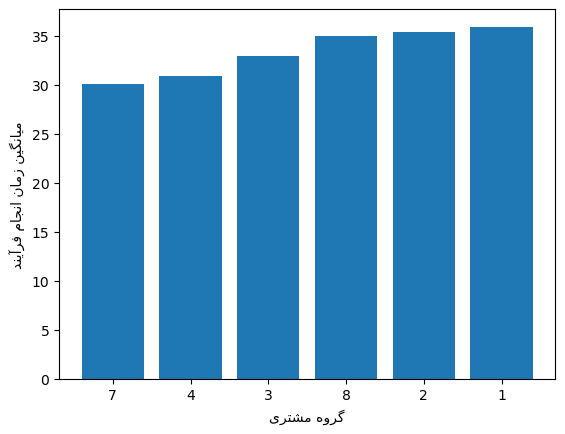

In [40]:
plt.bar(x_values.astype(str),y_values)
plt.xlabel(_('گروه مشتری'))
plt.ylabel(_('میانگین زمان انجام فرآیند'))
plt.show()

In [19]:
returned_df = duration_df[duration_df['returned status'] == 'مرجوع شده']
returned_df

,case id,customer group,returned status,Case_duration_Sum
44,100990044,8,مرجوع شده,53.669722
53,100990161,1,مرجوع شده,53.446389
138,100991292,1,مرجوع شده,50.803889
145,100991379,8,مرجوع شده,50.635278
170,100991738,1,مرجوع شده,47.625833
...,...,...,...,...
12539,101188456,1,مرجوع شده,26.011667
12547,101188544,1,مرجوع شده,25.573611
12561,101188636,1,مرجوع شده,26.771944
12581,101188900,1,مرجوع شده,24.798611


In [20]:
result_table = returned_df.groupby('customer group').size().reset_index(name='number of returned').sort_values(by='customer group', ascending=True)
result_table

,customer group,number of returned
0,1,834
1,3,2
2,4,1
3,7,1
4,8,21


In [21]:
df2 = {'customer group': 2, 'number of returned': 0}
df3 = result_table._append(df2, ignore_index = True).sort_values(by='customer group', ascending=True).reset_index(drop=True)
df3

,customer group,number of returned
0,1,834
1,2,0
2,3,2
3,4,1
4,7,1
5,8,21


In [22]:
count_of_customer_groups=duration_df['customer group'].value_counts().reset_index().sort_values(by='customer group', ascending=True).reset_index(drop=True)
count_of_customer_groups['number of returned']=df3['number of returned']
count_of_customer_groups['returned rate']=df3['number of returned']/count_of_customer_groups['count']
count_of_customer_groups

,customer group,count,number of returned,returned rate
0,1,11716,834,0.071185
1,2,9,0,0.000000
2,3,191,2,0.010471
3,4,15,1,0.066667
4,7,6,1,0.166667
5,8,666,21,0.031532


In [23]:
customer_group_values=count_of_customer_groups['customer group']
number_of_returned_values=count_of_customer_groups['returned rate']
#customer_group_values
number_of_returned_values

0    0.071185
1    0.000000
2    0.010471
3    0.066667
4    0.166667
5    0.031532
Name: returned rate, dtype: float64

<div style="direction:rtl;line-height:300%;">
	<font face="XB Nazanin" size=4 color=blue>
		<div align=right>
			<font face="B Nazanin" size=5>
								<p></p>
   در نمودار زیر درصد مرجوعی هر گروه را نمایش می‌دهد(تعداد مرجوعی‌های هر گروه/تعدادسفارش‌های هر گروه)<br>
               کم ترین نرخ مرجوعی به ترتیب برای گروه 2، 3 و8 است.

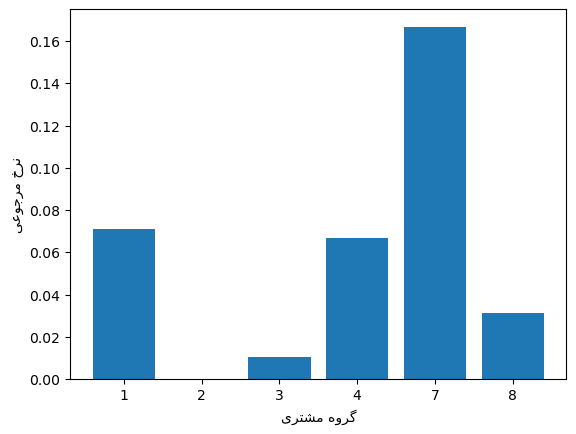

In [42]:
plt.bar(customer_group_values.astype(str),number_of_returned_values)
plt.xlabel(_('گروه مشتری'))
plt.ylabel(_('نرخ مرجوعی'))
plt.show()

<div style="direction:rtl;line-height:300%;">
	<font face="XB Nazanin" size=4 color=blue>
		<div align=right>
			<font face="B Nazanin" size=5>
				<p></p>
				<p></p>
             بدست آوردن ماه ها و روزهای هفته از روی تاریخ فارسی

In [25]:
Persian_date=[jdatetime.datetime(event_log_int[item][0],event_log_int[item][1],event_log_int[item][2],event_log_int[item][3],event_log_int[item][4],event_log_int[item][5]).strftime("%Y-%m-%d %H:%M:%S") for item in range(99973)]
Persian_date

['1400-07-01 08:11:44',
 '1400-07-01 11:38:51',
 '1400-07-01 12:48:12',
 '1400-07-01 15:15:40',
 '1400-07-03 06:59:57',
 '1400-07-03 14:17:23',
 '1400-07-03 14:40:21',
 '1400-07-03 14:40:36',
 '1400-07-01 08:20:41',
 '1400-07-01 11:38:58',
 '1400-07-01 12:48:12',
 '1400-07-01 15:15:40',
 '1400-07-03 06:59:57',
 '1400-07-03 14:17:23',
 '1400-07-03 14:40:21',
 '1400-07-03 14:40:36',
 '1400-07-01 08:22:04',
 '1400-07-01 11:39:04',
 '1400-07-01 12:48:13',
 '1400-07-01 15:11:48',
 '1400-07-03 07:45:27',
 '1400-07-03 15:20:48',
 '1400-07-03 15:35:34',
 '1400-07-03 15:35:55',
 '1400-07-01 08:27:13',
 '1400-07-01 11:39:09',
 '1400-07-01 12:48:13',
 '1400-07-01 15:21:37',
 '1400-07-03 13:22:22',
 '1400-07-03 13:47:36',
 '1400-07-03 13:54:03',
 '1400-07-03 13:54:10',
 '1400-07-01 08:37:20',
 '1400-07-01 11:39:14',
 '1400-07-01 12:48:13',
 '1400-07-01 15:23:29',
 '1400-07-03 06:50:57',
 '1400-07-03 15:23:05',
 '1400-07-03 15:28:19',
 '1400-07-03 15:28:37',
 '1400-07-01 08:40:03',
 '1400-07-01 11:

In [70]:
Persian_Month=[jdatetime.datetime.strptime(Persian_date[i],"%Y-%m-%d %H:%M:%S").strftime("%B") for i in range(99973)]
# Create a mapping of old values to new values
mapping_Month = {'Farvardin': 'فروردین', 
           'Ordibehesht': 'اردیبهشت', 
           'Khordad': 'خرداد', 
           'Tir': 'تیر', 
           'Mordad': 'مرداد', 
           'Shahrivar':'شهریور' ,
           'Mehr':'مهر',
           'Aban':'آبان',
           'Azar':'آذر',
           'Dey':'دی',
           'Bahman':'بهمن',
           'Esfand': 'اسفند'                        
          }

# Replace values in the column
new_Persian_Month = [mapping_Month[val] for val in Persian_Month]
new_Persian_Month

['مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',
 'مهر',


In [27]:
Persian_Day=[jdatetime.datetime.strptime(Persian_date[i],"%Y-%m-%d %H:%M:%S").strftime("%A") for i in range(99973)]
mapping_Day = {'Saturday': 'شنبه', 
               'Sunday': 'یکشنبه', 
               'Monday': 'دوشنبه', 
               'Tuesday': 'سه شنبه', 
               'Wednesday': 'چهارشنبه', 
               'Thursday':'پنج شنبه' ,
               'Friday':'جمعه'                                 
             }
new_Persian_Day=[mapping_Day[val] for val in Persian_Day]

In [28]:
event_log['ماه']=new_Persian_Month
event_log['روز هفته']=new_Persian_Day

In [29]:
event_log

,case id,activity,زمان انجام,نوع سند,ناحيه فروش,شرح ناحيه فروش,مشتري,customer group,شرح گروه مشتري,نام کاربري,...,نام ويزيتور,returned status,سند حمل,کد موزع,نام موزع,نوع پرداخت,شرح نوع پرداخت,timestamp,ماه,روز هفته
0,100989739,سفارش فروش,1400/07/01 08:11:44,ZO20,202012,منطقه10,14021788,1,خرده فروشي,VARANEGAR,...,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 08:11:44,مهر,پنج شنبه
1,100989739,تاييد سرپرست,1400/07/01 11:38:51,ZO20,202012,منطقه10,14021788,1,خرده فروشي,A_KESHAVARZ,...,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 11:38:51,مهر,پنج شنبه
2,100989739,دستور تحويل,1400/07/01 12:48:12,ZLF3,202012,منطقه10,14021788,1,خرده فروشي,F_ASHNAGAR,...,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 12:48:12,مهر,پنج شنبه
3,100989739,سند حمل,1400/07/01 15:15:40,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,...,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 15:15:40,مهر,پنج شنبه
4,100989739,دريافت تور,1400/07/03 06:59:57,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,...,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-25 06:59:57,مهر,شنبه
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99968,101189084,سند حمل,1400/09/30 16:21:59,ZP01,202005,منطقه2,14020440,1,خرده فروشي,H_FALAH,...,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-21 16:21:59,آذر,سه شنبه
99969,101189084,دريافت تور,1400/10/01 06:54:30,ZP01,202005,منطقه2,14020440,1,خرده فروشي,H_FALAH,...,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-22 06:54:30,دی,چهارشنبه
99970,101189084,ارسال تور,1400/10/01 12:20:50,ZP01,202005,منطقه2,14020440,1,خرده فروشي,H_FALAH,...,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-22 12:20:50,دی,چهارشنبه
99971,101189084,سند انبار,1400/10/01 13:43:54,WL,202005,منطقه2,14020440,1,خرده فروشي,R_MIRAZIMI,...,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-22 13:43:54,دی,چهارشنبه


<div style="direction:rtl;line-height:300%;">
	<font face="XB Nazanin" size=4 color=blue>
		<div align=right>
			<font face="B Nazanin" size=5>
				<p></p>
				<p></p>
            توزیع میزان سفارش بر حسب «ماه» و «روزهای هفته» 

In [65]:
Order_df = event_log[event_log['activity'] == 'سفارش فروش']

In [66]:
Order_df

,case id,activity,زمان انجام,نوع سند,ناحيه فروش,شرح ناحيه فروش,مشتري,customer group,شرح گروه مشتري,نام کاربري,...,نام ويزيتور,returned status,سند حمل,کد موزع,نام موزع,نوع پرداخت,شرح نوع پرداخت,timestamp,ماه,روز هفته
0,100989739,سفارش فروش,1400/07/01 08:11:44,ZO20,202012,منطقه10,14021788,1,خرده فروشي,VARANEGAR,...,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 08:11:44,مهر,پنج شنبه
8,100989752,سفارش فروش,1400/07/01 08:20:41,ZO20,202012,منطقه10,14023383,1,خرده فروشي,VARANEGAR,...,فرزاد اصغر زاده,مرجوع نشده,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 08:20:41,مهر,پنج شنبه
16,100989754,سفارش فروش,1400/07/01 08:22:04,ZO20,202015,منطقه12,14024191,1,خرده فروشي,VARANEGAR,...,محمد اصغری,مرجوع نشده,142569,E5700211,وحید پورداوری,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 08:22:04,مهر,پنج شنبه
24,100989758,سفارش فروش,1400/07/01 08:27:13,ZO20,202005,منطقه2,14025292,1,خرده فروشي,VARANEGAR,...,حجت صفری,مرجوع نشده,142604,E5701241,محمد جواد میرقادری,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 08:27:13,مهر,پنج شنبه
32,100989776,سفارش فروش,1400/07/01 08:37:20,ZO20,202005,منطقه2,14028229,1,خرده فروشي,VARANEGAR,...,علیرضا طهماسبی نیا,مرجوع نشده,142605,E5700917,علی حسنی,PTCA,نقدي - تسويه تا راس مشمول نقد,2021-09-23 08:37:20,مهر,پنج شنبه
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99933,101189076,سفارش فروش,1400/09/30 13:43:07,ZO20,202003,منطقه6,14026255,1,خرده فروشي,VARANEGAR,...,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-21 13:43:07,آذر,سه شنبه
99941,101189079,سفارش فروش,1400/09/30 13:43:38,ZO20,202005,منطقه2,14026368,1,خرده فروشي,VARANEGAR,...,مهرداد لطفی علیداشی,مرجوع نشده,166751,E5700198,احمد امین,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-21 13:43:38,آذر,سه شنبه
99949,101189080,سفارش فروش,1400/09/30 13:44:17,ZO20,202005,منطقه2,14024092,1,خرده فروشي,VARANEGAR,...,صادق توده زعیم,مرجوع نشده,166751,E5700198,احمد امین,PT02,رسيدي,2021-12-21 13:44:17,آذر,سه شنبه
99957,101189081,سفارش فروش,1400/09/30 13:44:20,ZO20,202004,منطقه7,14025180,1,خرده فروشي,VARANEGAR,...,فرهاد نوروزی,مرجوع نشده,166756,E5700917,علی حسنی,PT01,نقد / حواله / پوز - تسويه کامل آني,2021-12-21 13:44:20,آذر,سه شنبه


In [111]:
Month_in_order=['مهر','آبان','آذر']
Order_Month_Counts=Order_df['ماه'].value_counts().reset_index()
Order_Month_Counts['ماه']=pd.Categorical(Order_Month_Counts['ماه'],categories=Month_in_order,ordered=True)
Order_Month_Counts=Order_Month_Counts.sort_values('ماه').reset_index(drop=True)

Order_Month_Count_values=Order_Month_Counts['count']
Order_Month=Order_Month_Counts['ماه']
#Order_Count_values
Order_Month_labels = [_(Order_Month) for Order_Month in Order_Month]


In [113]:
Order_Month_Counts

,ماه,count
0,مهر,4374
1,آبان,3984
2,آذر,4245


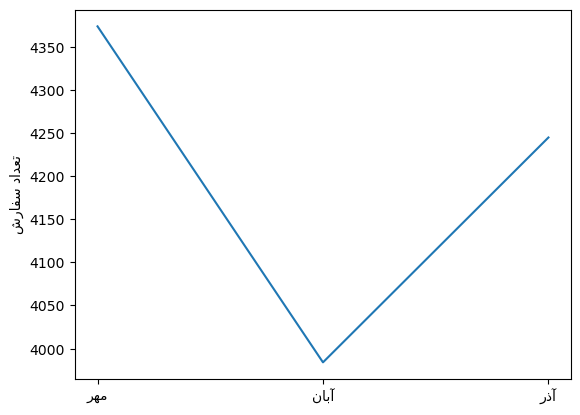

In [112]:
plt.plot(Order_Month_labels,Order_Month_Count_values)
plt.ylabel(_('تعداد سفارش'))
plt.show()

In [106]:
weekdays_in_order=['شنبه','یکشنبه','دوشنبه','سه شنبه','چهارشنبه','پنج شنبه','جمعه']
Order_weekday_Counts=Order_df['روز هفته'].value_counts().reset_index()
Order_weekday_Counts['روز هفته']=pd.Categorical(Order_weekday_Counts['روز هفته'],categories=weekdays_in_order,ordered=True)
Order_weekday_Counts=Order_weekday_Counts.sort_values('روز هفته').reset_index(drop=True)

In [114]:
Order_weekday_Counts

,روز هفته,count
0,شنبه,2355
1,یکشنبه,2081
2,دوشنبه,1957
3,سه شنبه,2128
4,چهارشنبه,1826
5,پنج شنبه,2256


In [107]:
Order_Count_values=Order_weekday_Counts['count']
Order_weekday=Order_weekday_Counts['روز هفته']
#Order_Count_values
Order_weekday_labels = [_(Order_weekday) for Order_weekday in Order_weekday]

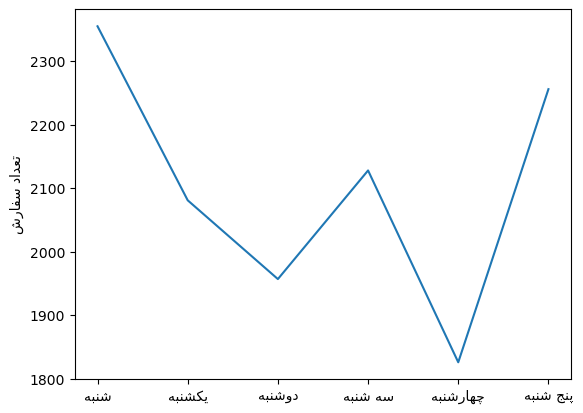

In [109]:
plt.plot(Order_weekday_labels,Order_Count_values)
plt.ylabel(_('تعداد سفارش'))
plt.show()